In [1]:
from deap import base
from deap import creator
from deap import tools
import scipy.io as sio
import numpy
import matplotlib.pyplot as plt
import math
import random

# Jasper

In [2]:
# jasper_path = '../data/real/jasper/jasper.mat'
# data = sio.loadmat(jasper_path)
# nRow = data['nRow'][0][0]
# nCol = data['nCol'][0][0]
# nBand = data['Y'].shape[0]
# nPixel = nRow*nCol
# d = [nRow, nCol, nBand]
# Y = data['Y']
# gt_jasper_path = '../data/real/jasper/jasper.gt'
# gt = sio.loadmat(gt_jasper_path)
# M = gt['M']
# p = M.shape[1]
# s = Y.mean(axis=0)
# mu = s.mean()
# sigma = s.std()
# display(mu)
# display(sigma)
# import matplotlib.pyplot as plt
# count, bins, ignored = plt.hist(s, 30, density=True)
# plt.plot(bins, 1/(sigma * numpy.sqrt(2 * numpy.pi)) *
#                 numpy.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#                   linewidth=2, color='r')
# plt.show()

# Cuprite

In [3]:
# cuprite_path = '../data/real/cuprite/cuprite.mat'
# data = sio.loadmat(cuprite_path)
# nRow = data['nRow'][0][0]
# nCol = data['nCol'][0][0]
# nBand = data['Y'].shape[0]
# nPixel = nRow*nCol
# d = [nRow, nCol, nBand]
# Y = data['Y']
# gt_cuprite_path = '../data/real/cuprite/cuprite.gt'
# gt = sio.loadmat(gt_cuprite_path)
# M = gt['M']
# p = M.shape[1]
# s = Y.mean(axis=0)
# mu = s.mean()
# sigma = s.std()
# display(mu)
# display(sigma)
# import matplotlib.pyplot as plt
# count, bins, ignored = plt.hist(s, 30, density=True)
# plt.plot(bins, 1/(sigma * numpy.sqrt(2 * numpy.pi)) *
#                 numpy.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#                   linewidth=2, color='r')
# plt.show()

In [4]:
# samson_path = '../data/real/samson/samson.mat'
# data = sio.loadmat(samson_path)
# nRow = data['nRow'][0][0]
# nCol = data['nCol'][0][0]
# nBand = data['V'].shape[0]
# nPixel = nRow*nCol
# d = [nRow, nCol, nBand]
# Y = data['V']
# gt_samson_path = '../data/real/samson/samson.gt'
# gt = sio.loadmat(gt_samson_path)
# M = gt['M']
# p = M.shape[1]
# s = Y.mean(axis=0)
# mu = s.mean()
# sigma = s.std()
# display(mu)
# display(sigma)
# import matplotlib.pyplot as plt
# count, bins, ignored = plt.hist(s, 30, density=True)
# plt.plot(bins, 1/(sigma * numpy.sqrt(2 * numpy.pi)) *
#                 numpy.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#                   linewidth=2, color='r')
# plt.show()

/Users/Winston/.pyenv/versions/3.5.6/envs/EHSI/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ushort_scalars
  


167.12874891818615

75.06061272862725

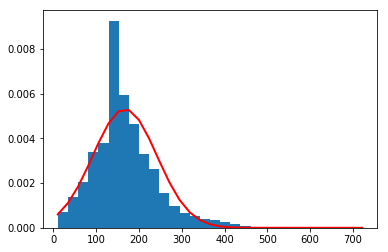

In [5]:
urban_path = '../data/real/urban/urban.mat'
data = sio.loadmat(urban_path)
nRow = data['nRow'][0][0]
nCol = data['nCol'][0][0]
nBand = data['Y'].shape[0]
nPixel = nRow*nCol
d = [nRow, nCol, nBand]
Y = data['Y']
gt_urban_path = '../data/real/urban/urban.gt'
gt = sio.loadmat(gt_urban_path)
M = gt['M']
p = M.shape[1]
s = Y.mean(axis=0)
mu = s.mean()
sigma = s.std()
display(mu)
display(sigma)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * numpy.sqrt(2 * numpy.pi)) *
                numpy.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                  linewidth=2, color='r')
plt.show()

In [6]:
def create_individual_GAEE(p,npixel):
    aux = numpy.random.choice(list(range(0,npixel)),p)
    return aux

In [7]:
def create_individual_GAEEII(p,nRow,nCol):
    x = numpy.random.choice(list(range(0,nRow)),p)
    y = numpy.random.choice(list(range(0,nCol)),p)
#     print('create x', x)
#     print('create y', y)
    aux = x*nRow+y
    return aux

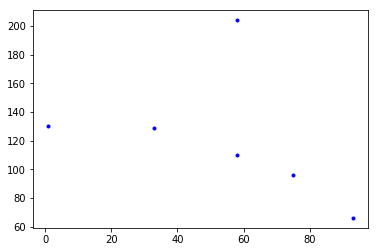

In [8]:
ind = create_individual_GAEE(p,nPixel)
# display(ind)
x = list(map(lambda x: math.floor(x/nRow),ind))
y = list(map(lambda x: math.floor(x%nRow),ind))
# display(x)
# display(y)
plt.plot(x,y,'.b');

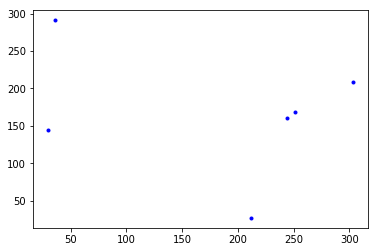

In [9]:
ind = create_individual_GAEEII(p,nRow, nCol)
# display(ind)
r_x = list(map(lambda x: math.floor(x/nRow),ind))
r_y = list(map(lambda x: math.floor(x%nRow),ind))
# display(r_x)
# display(r_y)
plt.plot(r_y,r_x,'.b');

In [10]:
def mutation_GAEE(individual,indpb,n):
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] = type(individual[i])( numpy.random.randint(0,n))
    return individual

In [11]:
def random_mutation_GAEEII(individual,indpb, nRow, nCol):
    for i in range(len(individual)):
        if random.random() < indpb:
            x = numpy.random.choice(list(range(0,nRow)))
            y = numpy.random.choice(list(range(0,nCol)))
            individual[i] = x*nRow+y
    return individual

In [12]:
toolbox = base.Toolbox()
toolbox.register("mutateRandomGAEE", mutation_GAEE, indpb = 1.0, n=nPixel)
toolbox.register("mutateRandomGAEEII", random_mutation_GAEEII, indpb = 1.0, nRow=nRow, nCol=nCol)
toolbox.register("mutateNSGAII_row", tools.mutPolynomialBounded, eta = 0.2, low=0, up=nRow, indpb=1.0)
toolbox.register("mutateNSGAII_col", tools.mutPolynomialBounded, eta = 0.2, low=0, up=nCol, indpb=1.0)
toolbox.register("mutateGaussian", tools.mutGaussian, mu=0, sigma=sigma/2, indpb=1.0)

In [13]:
def nsgaII_mutation_GAEEII(individual,indpb, nRow, nCol):
    
    for i in range(len(individual)):
        if random.random() < indpb:
            gene = individual[i]
            gene_x = math.floor(individual[i]/nRow) 
            gene_y = math.floor(individual[i]%nRow)
            
            mut_x = toolbox.mutateNSGAII_row([gene_x])
            mut_y = toolbox.mutateNSGAII_col([gene_y])

            mutated_gene = math.floor(mut_x[0][0])*nRow+math.floor(mut_y[0][0])
            individual[i] = mutated_gene
    return individual

In [14]:
def gaussian_mutation_GAEEII(individual,indpb, nRow, nCol):
    
    for i in range(len(individual)):
        if random.random() < indpb:
            gene = individual[i]
            gene_x = math.floor(individual[i]/nRow) 
            gene_y = math.floor(individual[i]%nRow)
            
            mut_x = toolbox.mutateGaussian([gene_x])
            mut_y = toolbox.mutateGaussian([gene_y])

            mutated_gene = abs(math.floor(mut_x[0][0])*nRow+math.floor(mut_y[0][0]))
            individual[i] = mutated_gene
    return individual

In [15]:
toolbox.register("mutationNsgaII", nsgaII_mutation_GAEEII, indpb = 1.0, nRow=nRow, nCol=nCol)
toolbox.register("mutationgaussian", gaussian_mutation_GAEEII, indpb = 1.0, nRow=nRow, nCol=nCol)

In [16]:
genesRandomGAEE = []
genesRandomGAEEII = []
genesNSGAIIGAEEII = []
genesGaussianGAEEII = []
for i in range(0,100):
    genesRandomGAEE.extend(toolbox.mutateRandomGAEE(ind.copy()))
    genesRandomGAEEII.extend(toolbox.mutateRandomGAEEII(ind.copy()))
    genesNSGAIIGAEEII.extend(toolbox.mutationNsgaII(ind.copy()))
    genesGaussianGAEEII.extend(toolbox.mutationgaussian(ind.copy()))

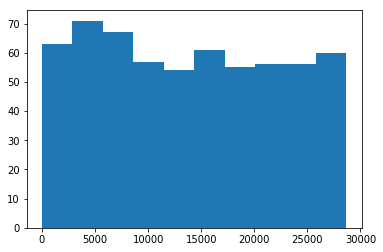

min 5
max 28673


In [17]:
plt.hist(genesRandomGAEE, 10)
plt.show()
print('min', min(genesRandomGAEE))
print('max', max(genesRandomGAEE))

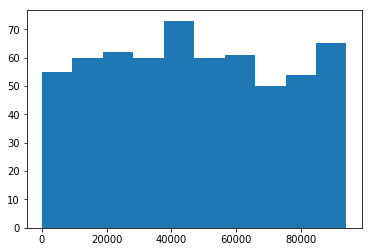

min 38
max 94125


In [18]:
plt.hist(genesRandomGAEEII, 10)
plt.show()
print('min', min(genesRandomGAEEII))
print('max', max(genesRandomGAEEII))

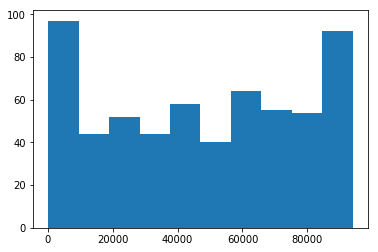

min 165
max 93954


In [19]:
plt.hist(genesNSGAIIGAEEII, 10)
plt.show()
print('min', min(genesNSGAIIGAEEII))
print('max', max(genesNSGAIIGAEEII))

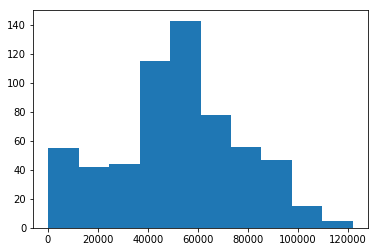

min 246
max 121893


In [20]:
plt.hist(genesGaussianGAEEII, 10)
plt.show()
print('min', min(genesGaussianGAEEII))
print('max', max(genesGaussianGAEEII))

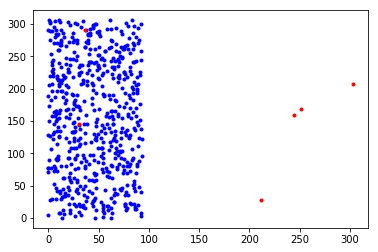

In [21]:
x = list(map(lambda z: math.floor(z/nRow),genesRandomGAEE))
y = list(map(lambda z: math.floor(z%nRow),genesRandomGAEE))
plt.plot(x,y,'.b')
plt.plot(r_y,r_x,'.r');

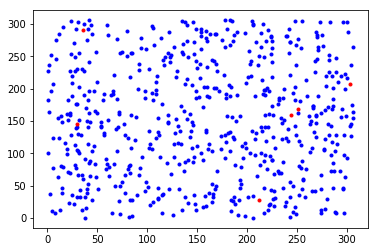

In [22]:
x = list(map(lambda z: math.floor(z/nRow),genesRandomGAEEII))
y = list(map(lambda z: math.floor(z%nRow),genesRandomGAEEII))
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');

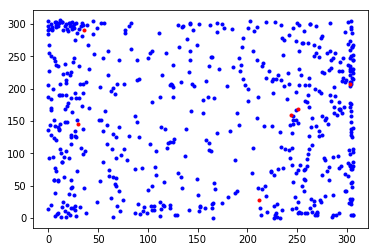

In [23]:
x = list(map(lambda z: math.floor(z/nRow),genesNSGAIIGAEEII))
y = list(map(lambda z: math.floor(z%nRow),genesNSGAIIGAEEII))
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');

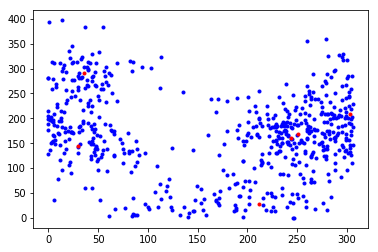

In [24]:
x = list(map(lambda z: math.floor(z/nRow),genesGaussianGAEEII))
y = list(map(lambda z: math.floor(z%nRow),genesGaussianGAEEII))
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');